In [1]:

import numpy as np
import scipy as sc
from config import config
from random import *
from collision import simulation
#from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pickle
#from mpl_toolkits import mplot3d
from operator import itemgetter



In [2]:
config['detector_char']['resolution']
layer_no = config['detector_geo']['no_layers']

In [3]:
sim = simulation()

In [4]:
rays_org, data_org = sim.sim_coll_()
data=pickle.load(open("tmp_files/collision_points.pkl", "rb"))
rays=pickle.load(open("tmp_files/rays.pkl", "rb"))

In [5]:
rays = np.array(rays)

In [6]:
data = np.array(data)
data_org = data_org


In [7]:
rays
data_org

[[(-0.17641250000000008, 0.05841249999999998, 1.0),
  (0.08933750000000001, -0.17348750000000002, 1.0),
  (-0.17746250000000008, -0.18366250000000006, 1.0),
  (-0.1500625000000001, 0.0118375, 1.0),
  (-0.05081250000000004, -0.0053875000000001005, 1.0),
  (0.13066250000000001, -0.08208750000000009, 1.0),
  (-0.04413750000000005, -0.2240375000000001, 1.0),
  (0.23888750000000003, -0.23661250000000011, 1.0),
  (0.2120625, 0.006237500000000007, 1.0),
  (0.2256125, -0.1372875, 1.0)],
 [(-0.3528375, 0.11681249999999999, 2.0),
  (0.1786875, -0.3469875000000001, 2.0),
  (-0.3549375, -0.3673375000000001, 2.0),
  (-0.30013750000000006, 0.02366250000000003, 2.0),
  (-0.1016125000000001, -0.010787500000000061, 2.0),
  (0.26131249999999995, -0.1641625000000001, 2.0),
  (-0.08826250000000002, -0.44806250000000003, 2.0),
  (0.4777875, -0.47321250000000004, 2.0),
  (0.4241375, 0.012487499999999985, 2.0),
  (0.4512125, -0.2745875000000001, 2.0)],
 [(-0.5292625, 0.1752125, 3.0),
  (0.2680375, -0.5204875

In [8]:
#data_org = sorted(data_org, key=itemgetter(1))

In [12]:
for l_i,l in enumerate(range(1, layer_no)):
    data_org[l_i] = sorted(data_org[l_i], key=itemgetter(0))

In [13]:
data_org

[[(-0.17746250000000008, -0.18366250000000006, 1.0),
  (-0.17641250000000008, 0.05841249999999998, 1.0),
  (-0.1500625000000001, 0.0118375, 1.0),
  (-0.05081250000000004, -0.0053875000000001005, 1.0),
  (-0.04413750000000005, -0.2240375000000001, 1.0),
  (0.08933750000000001, -0.17348750000000002, 1.0),
  (0.13066250000000001, -0.08208750000000009, 1.0),
  (0.2120625, 0.006237500000000007, 1.0),
  (0.2256125, -0.1372875, 1.0),
  (0.23888750000000003, -0.23661250000000011, 1.0)],
 [(-0.3549375, -0.3673375000000001, 2.0),
  (-0.3528375, 0.11681249999999999, 2.0),
  (-0.30013750000000006, 0.02366250000000003, 2.0),
  (-0.1016125000000001, -0.010787500000000061, 2.0),
  (-0.08826250000000002, -0.44806250000000003, 2.0),
  (0.1786875, -0.3469875000000001, 2.0),
  (0.26131249999999995, -0.1641625000000001, 2.0),
  (0.4241375, 0.012487499999999985, 2.0),
  (0.4512125, -0.2745875000000001, 2.0),
  (0.4777875, -0.47321250000000004, 2.0)],
 [(-0.5324125000000002, -0.5509875000000002, 3.0),
  (-0

In [11]:
data_org[0][data_org[0][:,0].sort()]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
data[0][:]

array([[-2.128625e-01, -3.625000e-04,  1.000000e+00],
       [-1.907875e-01, -8.996250e-02,  1.000000e+00]])

In [ ]:
#b[:,:, 0]
color_ = ['k', 'r', 'b', 'y', 'g', 'c', 'm']

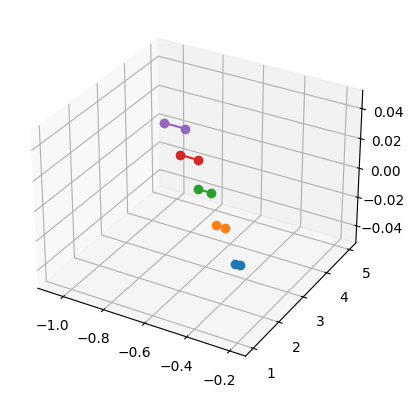

In [ ]:
fig = plt.figure()
#ax = Axes3D(fig)
ax=plt.axes(projection='3d')
l_2_p = 1/2
l_2_n = -1/2

x_d = [-1/2,1/2,1/2,-1/2],[0,1,1,0]
y_d = [-1/2,-1/2,1/2,1/2],[0,0,1,1]
z_d = [0,0,0,0],[1,1,1,1]

surfaces = []

#for i in range(len(x_d)):
#    surfaces.append( [list(zip(x_d[i],y_d[i],z_d[i]))] )
#
#for surface in surfaces:
#    ax.add_collection3d(Poly3DCollection(surface))
for i,j in enumerate(data[:,:, 0]): 
# Data for a three-dimensional line
   ax.plot3D(data[:,:, 0][i], data[:,:, 2][i], "-o")
#ax.scatter3D(a[0][0], a[0][1], a[0][2], color='k')
#ax.scatter3D(0,0,0, color='r')
fig.savefig(open("track.png", "wb"))

In [ ]:
tracks = []
#for i,_ in enumerate(data[:,:,0]):
rays_2, tmp_track = sim.tracks(rays, data)
tracks.append(tmp_track)

TypeError: 'int' object is not iterable

In [ ]:
np.array(tracks).shape

(1, 2, 3)

In [ ]:
np.array(rays_2).shape

(2, 3)

In [ ]:
rays_2

array([[ 0.05508395, -0.05820408,  0.48680803],
       [ 0.0796087 ,  0.09971245,  0.4649881 ]])

In [ ]:
tracks
t = np.arange(0,5)
x={}
y={}
z={}
for j,i  in enumerate(rays_2):
    x[j]=tracks[0][j][0]*t
    y[j] = tracks[0][j][1]*t
    z[j] = tracks[0][j][2]*t

In [ ]:
x

{0: array([0.     , 0.11315, 0.2263 , 0.33945, 0.4526 ]),
 1: array([0.      , 0.171205, 0.34241 , 0.513615, 0.68482 ])}

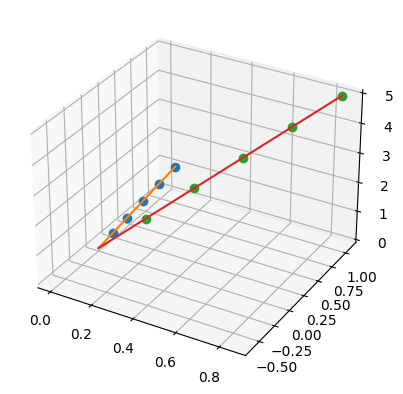

In [ ]:
fig = plt.figure()
#ax = Axes3D(fig)
ax=plt.axes(projection='3d')
l_2_p = 1/2
l_2_n = -1/2

x_d = [-1/2,1/2,1/2,-1/2],[0,1,1,0]
y_d = [-1/2,-1/2,1/2,1/2],[0,0,1,1]
z_d = [0,0,0,0],[1,1,1,1]

surfaces = []

#for i in range(len(x_d)):
#    surfaces.append( [list(zip(x_d[i],y_d[i],z_d[i]))] )
#
#for surface in surfaces:
#    ax.add_collection3d(Poly3DCollection(surface))
for i,j in enumerate(data[:,:, 0]): 
# Data for a three-dimensional line
   ax.plot3D(data_org[:,:, 0][i], data_org[:,:,1][i],data_org[:,:, 2][i], "o")
   #for k,_ in enumerate(x[i]):
   ax.plot3D((0,5*(tracks[0][i][0])), (0,5*(tracks[0][i][1])), (0,5*(tracks[0][i][2])))
#ax.scatter3D(a[0][0], a[0][1], a[0][2], color='k')
#ax.scatter3D(0,0,0, color='r')
fig.savefig(open("track.png", "wb"))

In [ ]:
tracks

[[[0.11315, -0.1195625, 1], [0.17120500000000002, 0.2144425, 1]]]

In [ ]:
data

array([[[ 0.1131625, -0.1195625,  1.       ],
        [ 0.2263125, -0.2391375,  2.       ],
        [ 0.3394625, -0.3586875,  3.       ],
        [ 0.4526125, -0.4782625,  4.       ],
        [ 0.5657625, -0.5978125,  5.       ]],

       [[ 0.1712125,  0.2144375,  1.       ],
        [ 0.3424125,  0.4288875,  2.       ],
        [ 0.5136125,  0.6433125,  3.       ],
        [ 0.6848125,  0.8577625,  4.       ],
        [ 0.8560375,  1.0722125,  5.       ]]])